# Market Segmentation of Electric Vehicles in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Featching Datasets

In [2]:
# 1st Dataset
df1 = pd.read_csv('ev_market_india_dataset.csv')
df1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
# 2nd Dataset
df2 = pd.read_csv('indian-auto-mpg.csv')
df2.head()

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


In [4]:
print(f' Shape of Data 1 : {df1.shape}')
print('\n===========================\n')
print(f'INFO OF DATA 1 : {df1.info()}')
print('\n================================\n')
print(f'Missing Value of df1 : {df1.isnull().sum()}')
print('\n=====================================\n')
print(f'Duplicated Value of df1 : {df1.duplicated().sum()}')
print('\n============================================\n')
print(f' Shape of Data 2 : {df2.shape}')
print('\n==============================\n')
print(f'INFO OF DATA 2 : {df2.info()}')
print('\n=======================================\n')
print(f'Missing Value of df2 : {df2.isnull().sum()}')
print('\n============================================\n')
print(f'Duplicated Value of df2 : {df2.duplicated().sum()}')

 Shape of Data 1 : (103, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB
INFO OF DATA 1 : None


Missing Value of df1 : Brand             

## Statistical summary of Data 1

In [5]:
df1.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


## Statistical summary of Data 2

In [6]:
df2.describe()

,Unnamed: 0,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price
count,5975.00000,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,3008.80887,2013.386778,5.867431e+04,1621.606695,112.599819,5.278828,18.179408,9.501647
std,1739.30056,3.247238,9.155851e+04,601.036987,53.659495,0.808959,4.521801,11.205736
min,0.00000,1998.000000,1.710000e+02,624.000000,34.200000,0.000000,0.000000,0.440000
25%,1502.50000,2012.000000,3.390800e+04,1198.000000,74.000000,5.000000,15.200000,3.500000
50%,3010.00000,2014.000000,5.300000e+04,1493.000000,92.700000,5.000000,18.160000,5.650000
75%,4514.50000,2016.000000,7.300000e+04,1984.000000,138.100000,5.000000,21.100000,9.950000
max,6018.00000,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,33.540000,160.000000


In [61]:
df1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [8]:
cat1 = df1.columns[df1.dtypes=='object']
con1 = df1.columns[df1.dtypes!='object']

In [9]:
cat1

Index(['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment'],
      dtype='object')

In [10]:
con1

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro'],
      dtype='object')

## EDA Analysis of Dataset 1

In [62]:
# using user defined function
from EDA import univariate

Categorical variable : ['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'] countplot



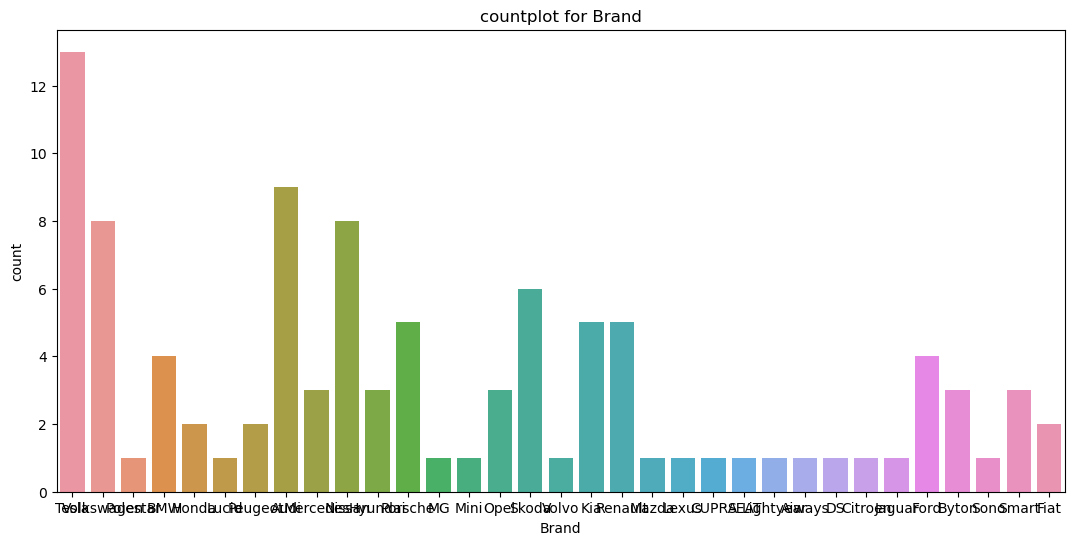

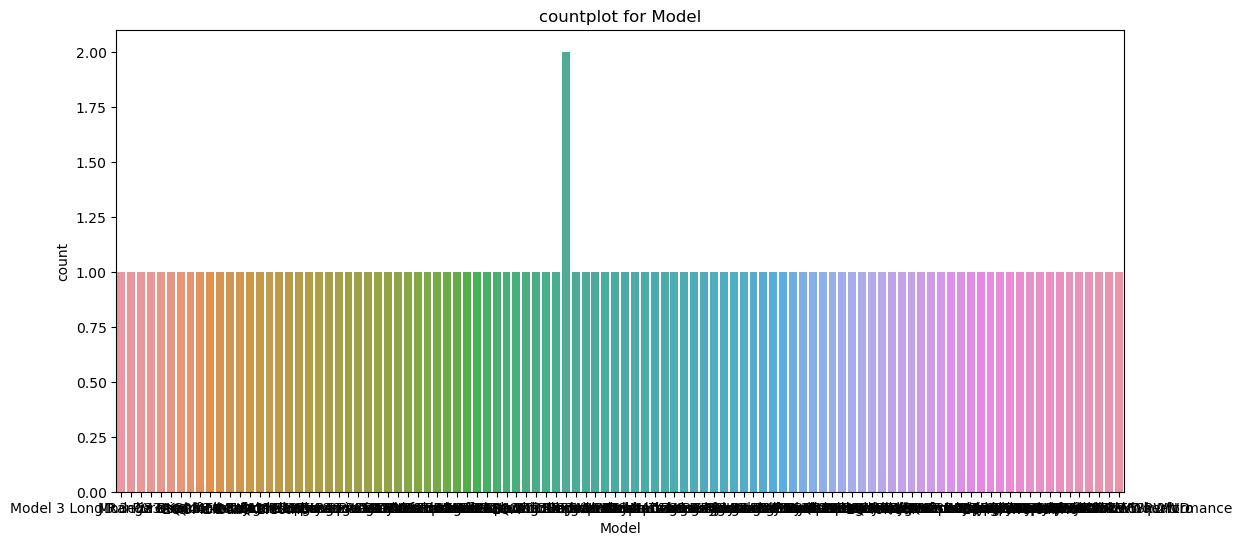

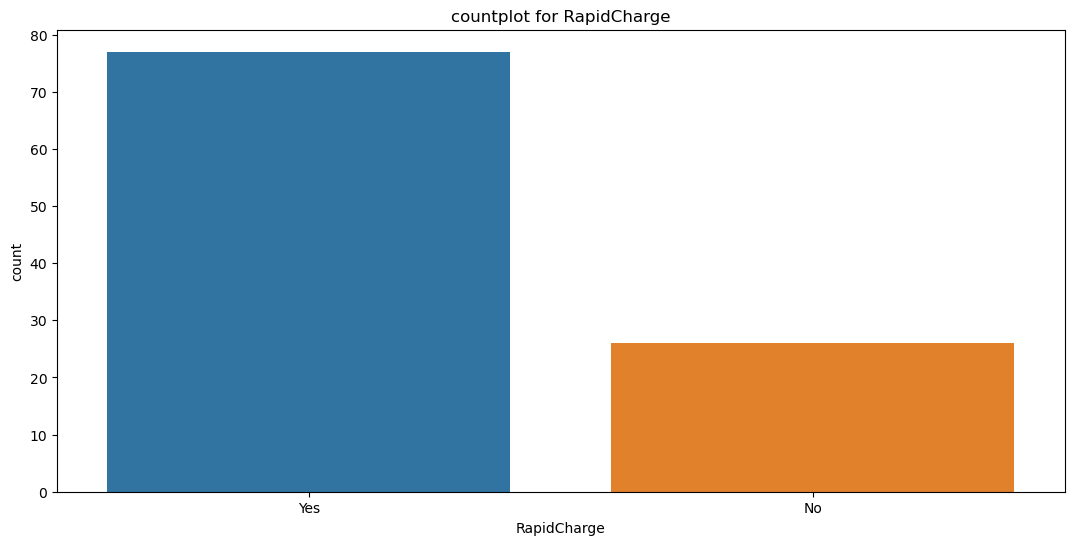

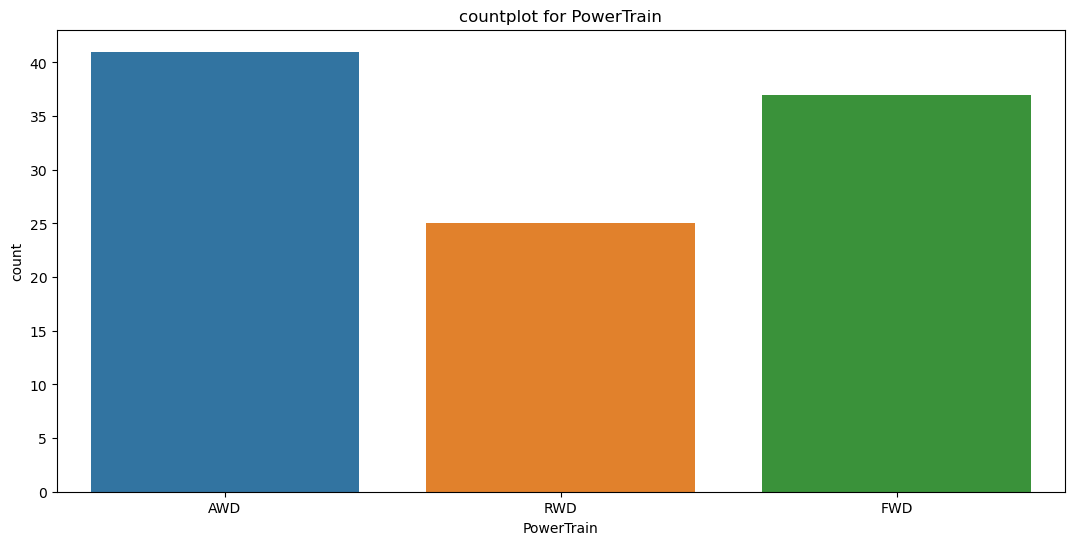

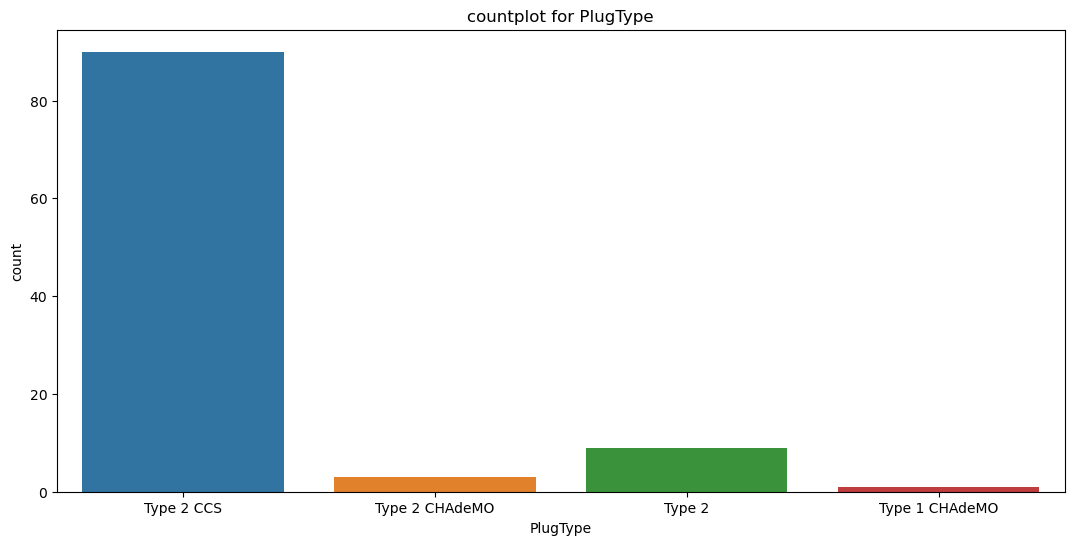

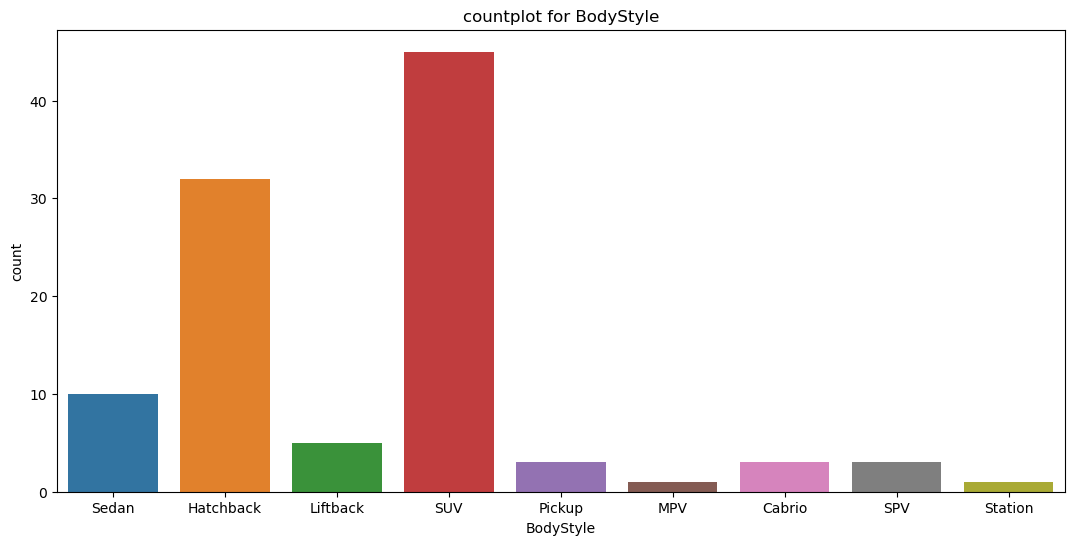

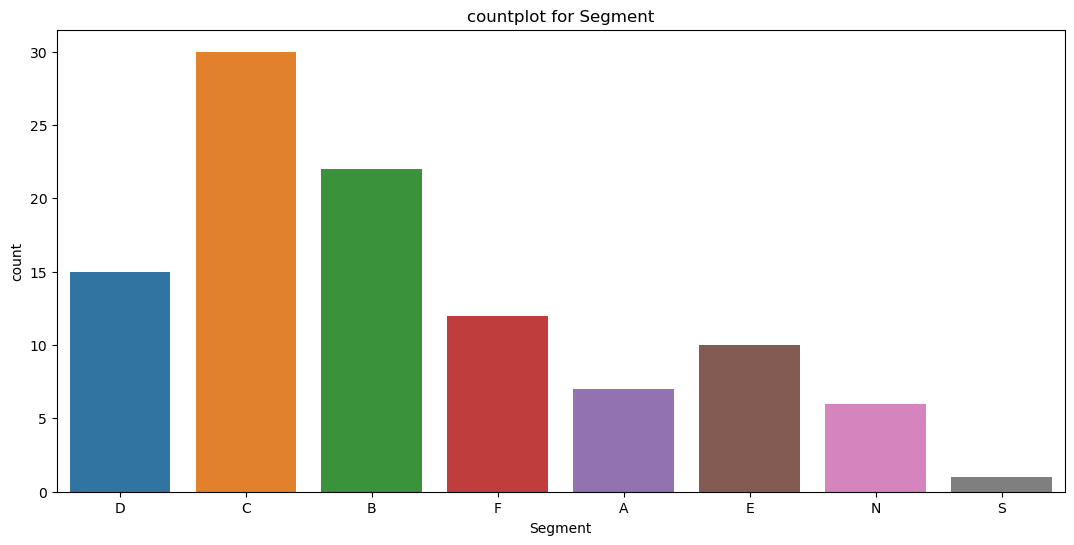



Contineous variable : ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro'] Histogram


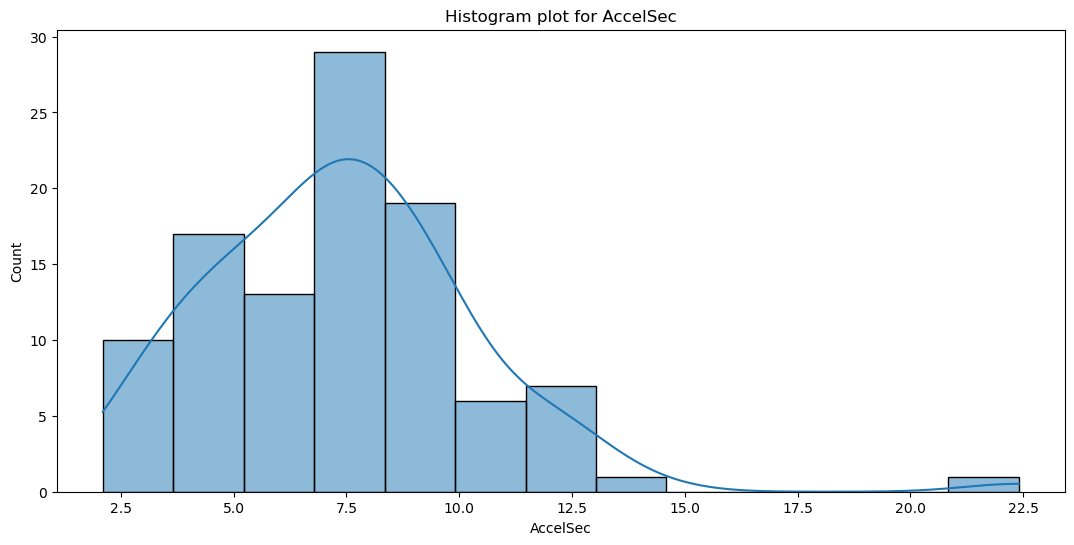

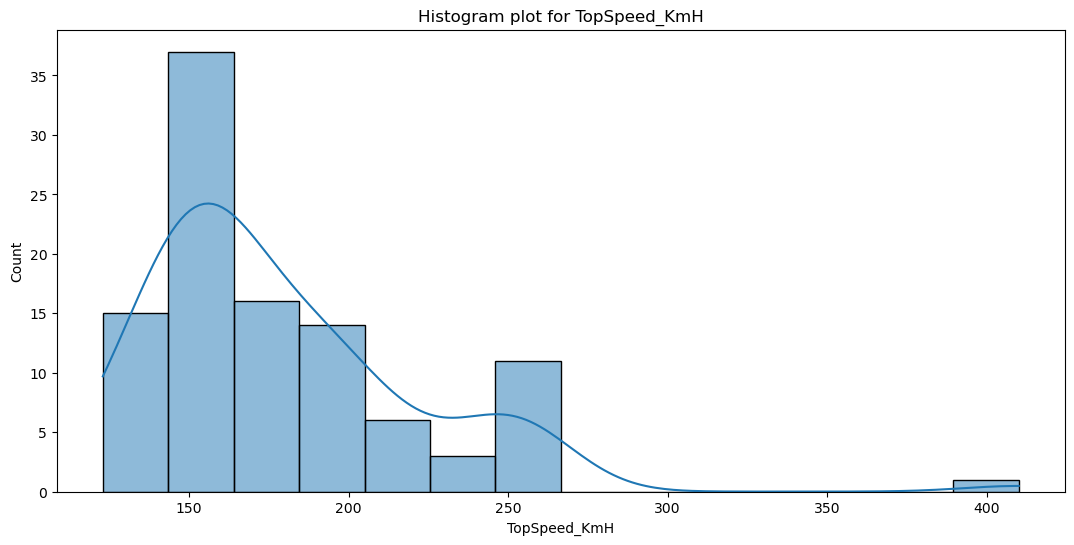

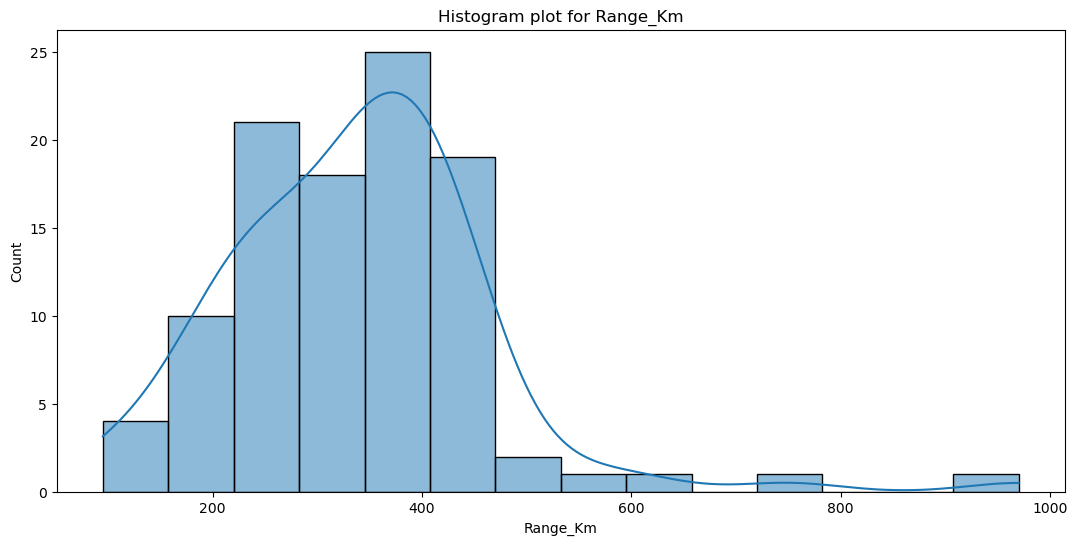

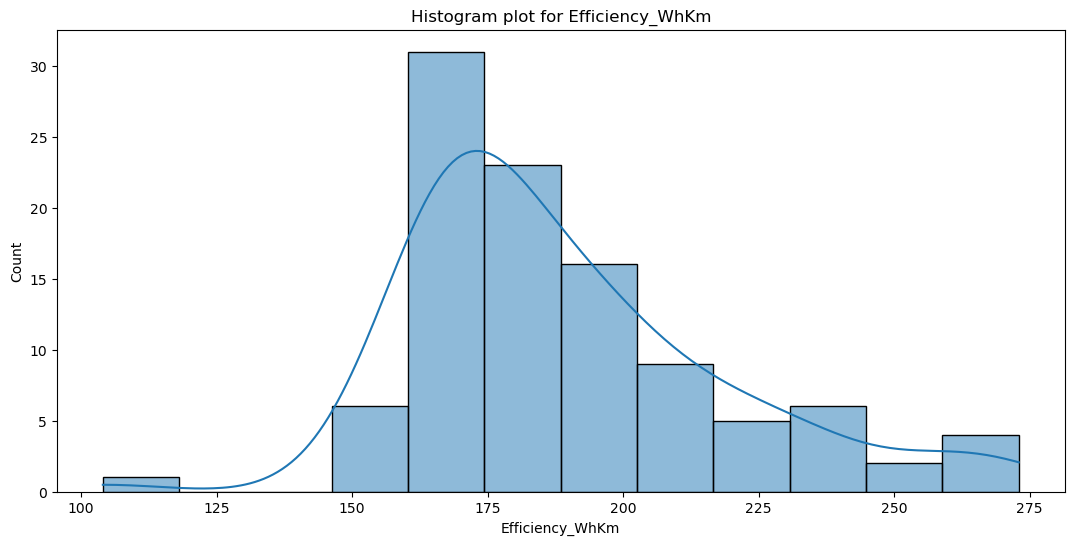

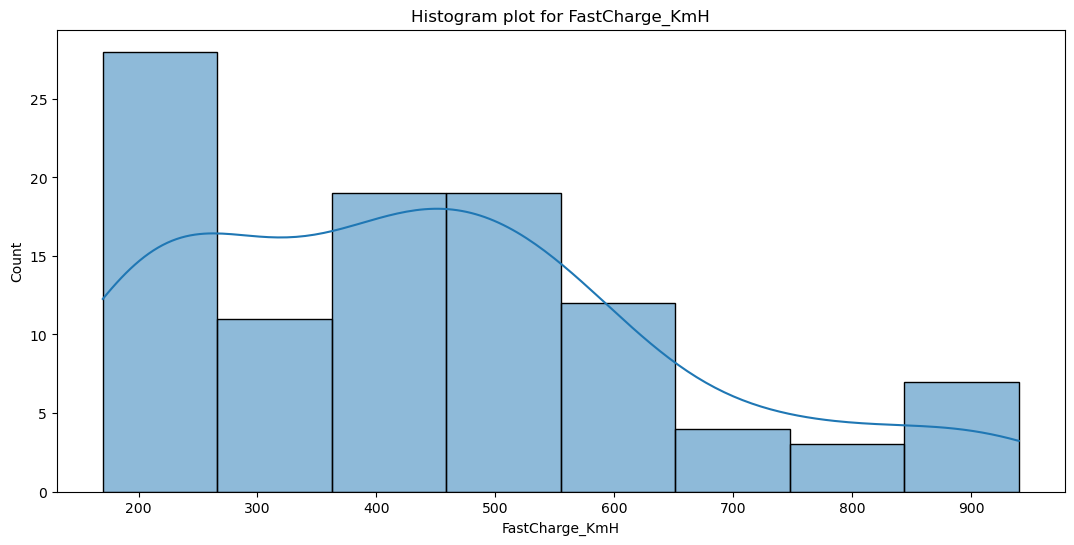

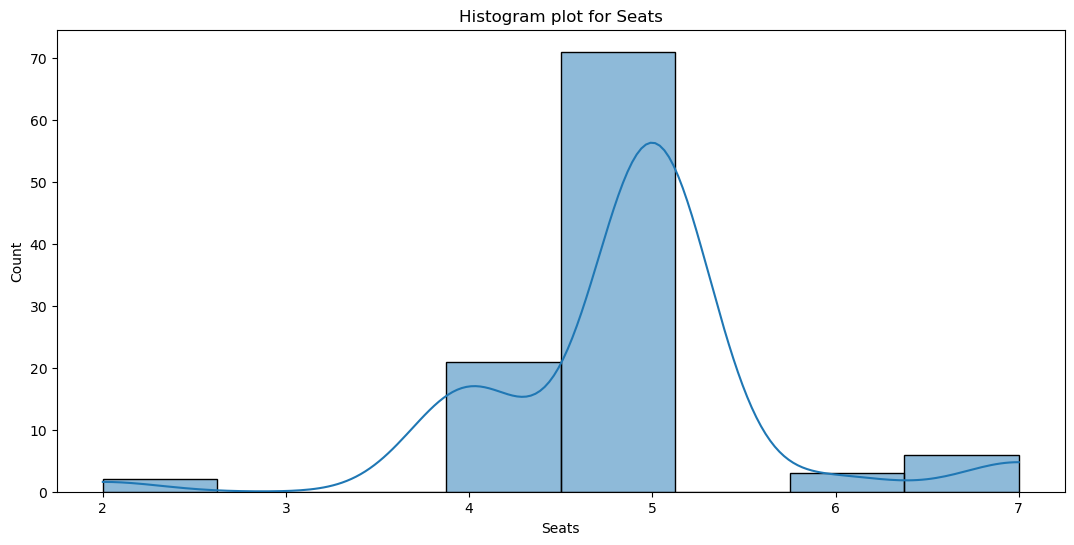

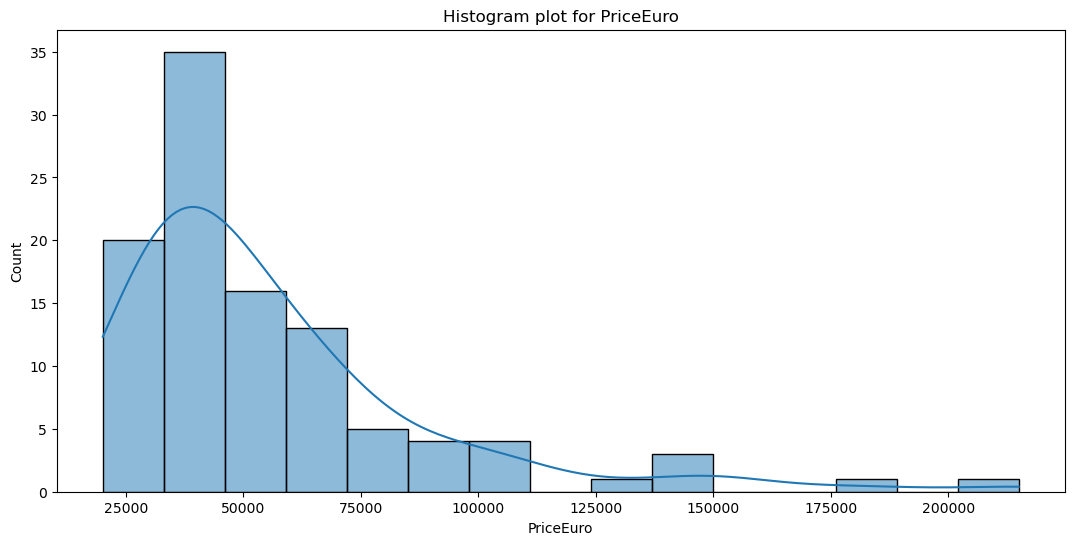

In [12]:
univariate(df1)

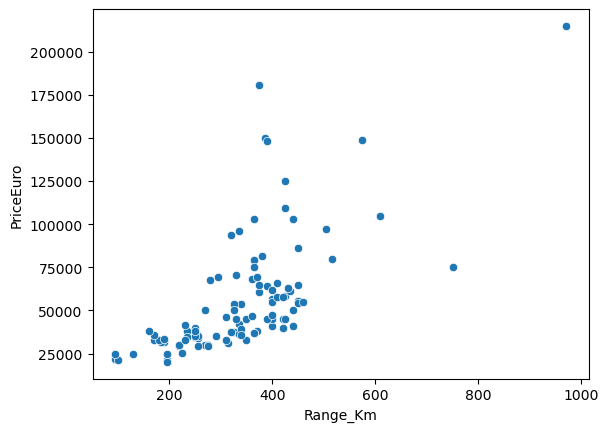

<Figure size 1000x600 with 0 Axes>

In [13]:
sns.scatterplot(data = df1, x='Range_Km', y='PriceEuro')
plt.figure(figsize=(10,6))
plt.show()

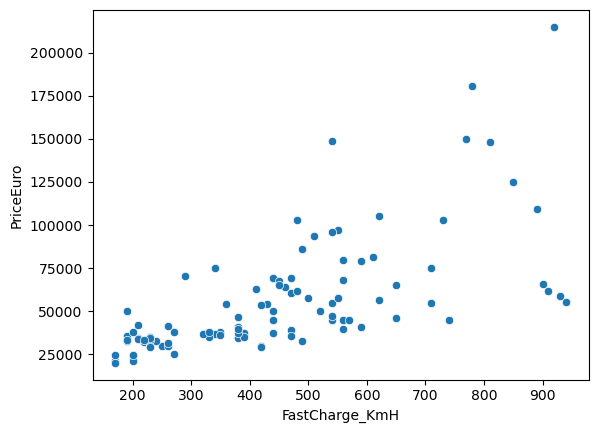

In [14]:
sns.scatterplot(data=df1, x='FastCharge_KmH', y='PriceEuro')
plt.show()

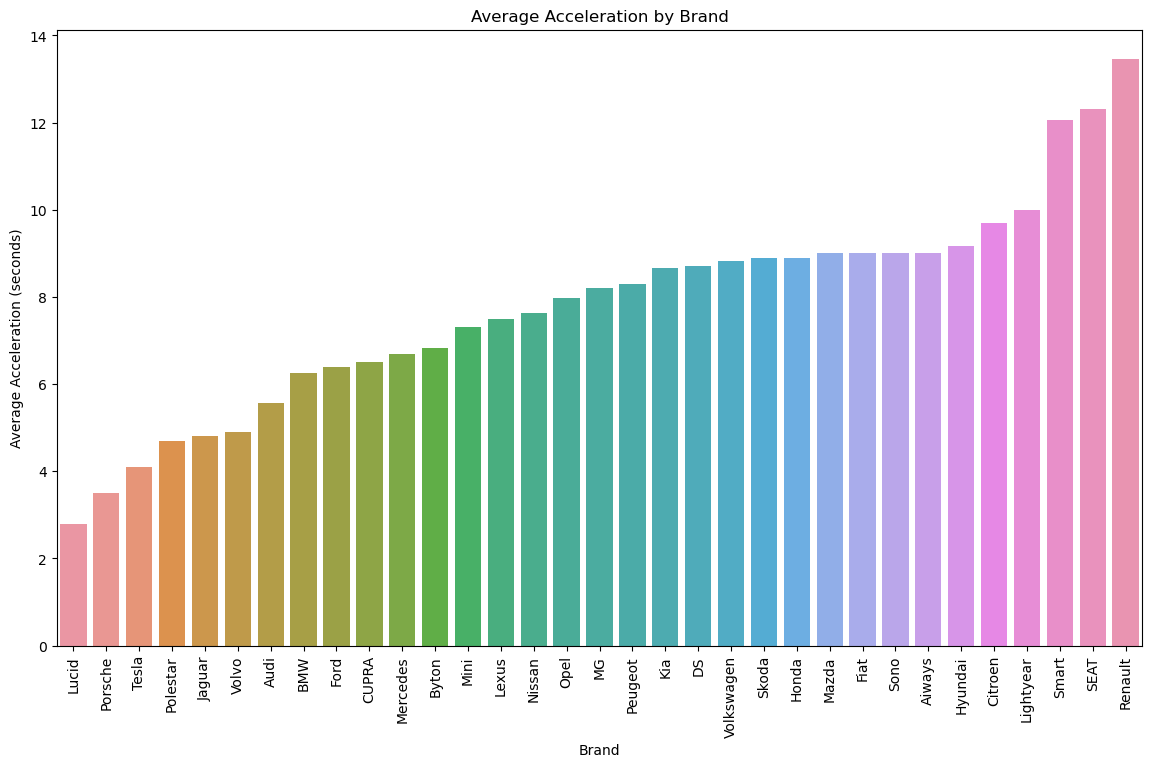

In [15]:
# Group by Brand and calculate mean acceleration
acceleration_by_brand = df1.groupby('Brand')['AccelSec'].mean().sort_values()

# Plot acceleration by brand

plt.figure(figsize=(14, 8))
sns.barplot(x=acceleration_by_brand.index, y=acceleration_by_brand.values)
plt.xticks(rotation=90)
plt.title('Average Acceleration by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Acceleration (seconds)')
plt.show()


In [16]:
# Identify the models with the highest and lowest top speeds
top_speed_max = df1.loc[df1['TopSpeed_KmH'].idxmax()]
top_speed_min = df1.loc[df1['TopSpeed_KmH'].idxmin()]

print("Model with the highest top speed:")
print('\n===============================\n')
print(top_speed_max[['Brand', 'Model', 'TopSpeed_KmH']])
print("\nModel with the lowest top speed:")
print('\n===============================\n')
print(top_speed_min[['Brand', 'Model', 'TopSpeed_KmH']])

Model with the highest top speed:


Brand              Tesla
Model           Roadster
TopSpeed_KmH         410
Name: 51, dtype: object

Model with the lowest top speed:


Brand                   Nissan
Model           e-NV200 Evalia
TopSpeed_KmH               123
Name: 66, dtype: object


In [17]:
# Identify the models with the longest and shortest ranges
range_max = df1.loc[df1['Range_Km'].idxmax()]
range_min = df1.loc[df1['Range_Km'].idxmin()]

print("Model with the longest range:")
print('\n===============================\n')
print(range_max[['Brand', 'Model', 'Range_Km']])
print("\nModel with the shortest range:")
print('\n===============================\n')
print(range_min[['Brand', 'Model', 'Range_Km']])


Model with the longest range:


Brand          Tesla
Model       Roadster
Range_Km         970
Name: 51, dtype: object

Model with the shortest range:


Brand            Smart
Model       EQ forfour
Range_Km            95
Name: 77, dtype: object


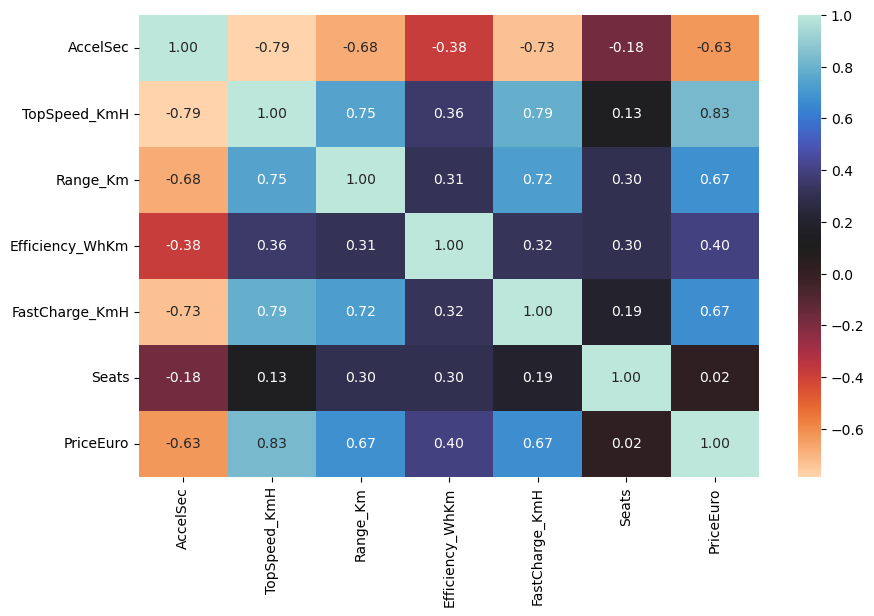

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df1[con1].corr(), annot=True, fmt='.2f', cmap='icefire_r')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

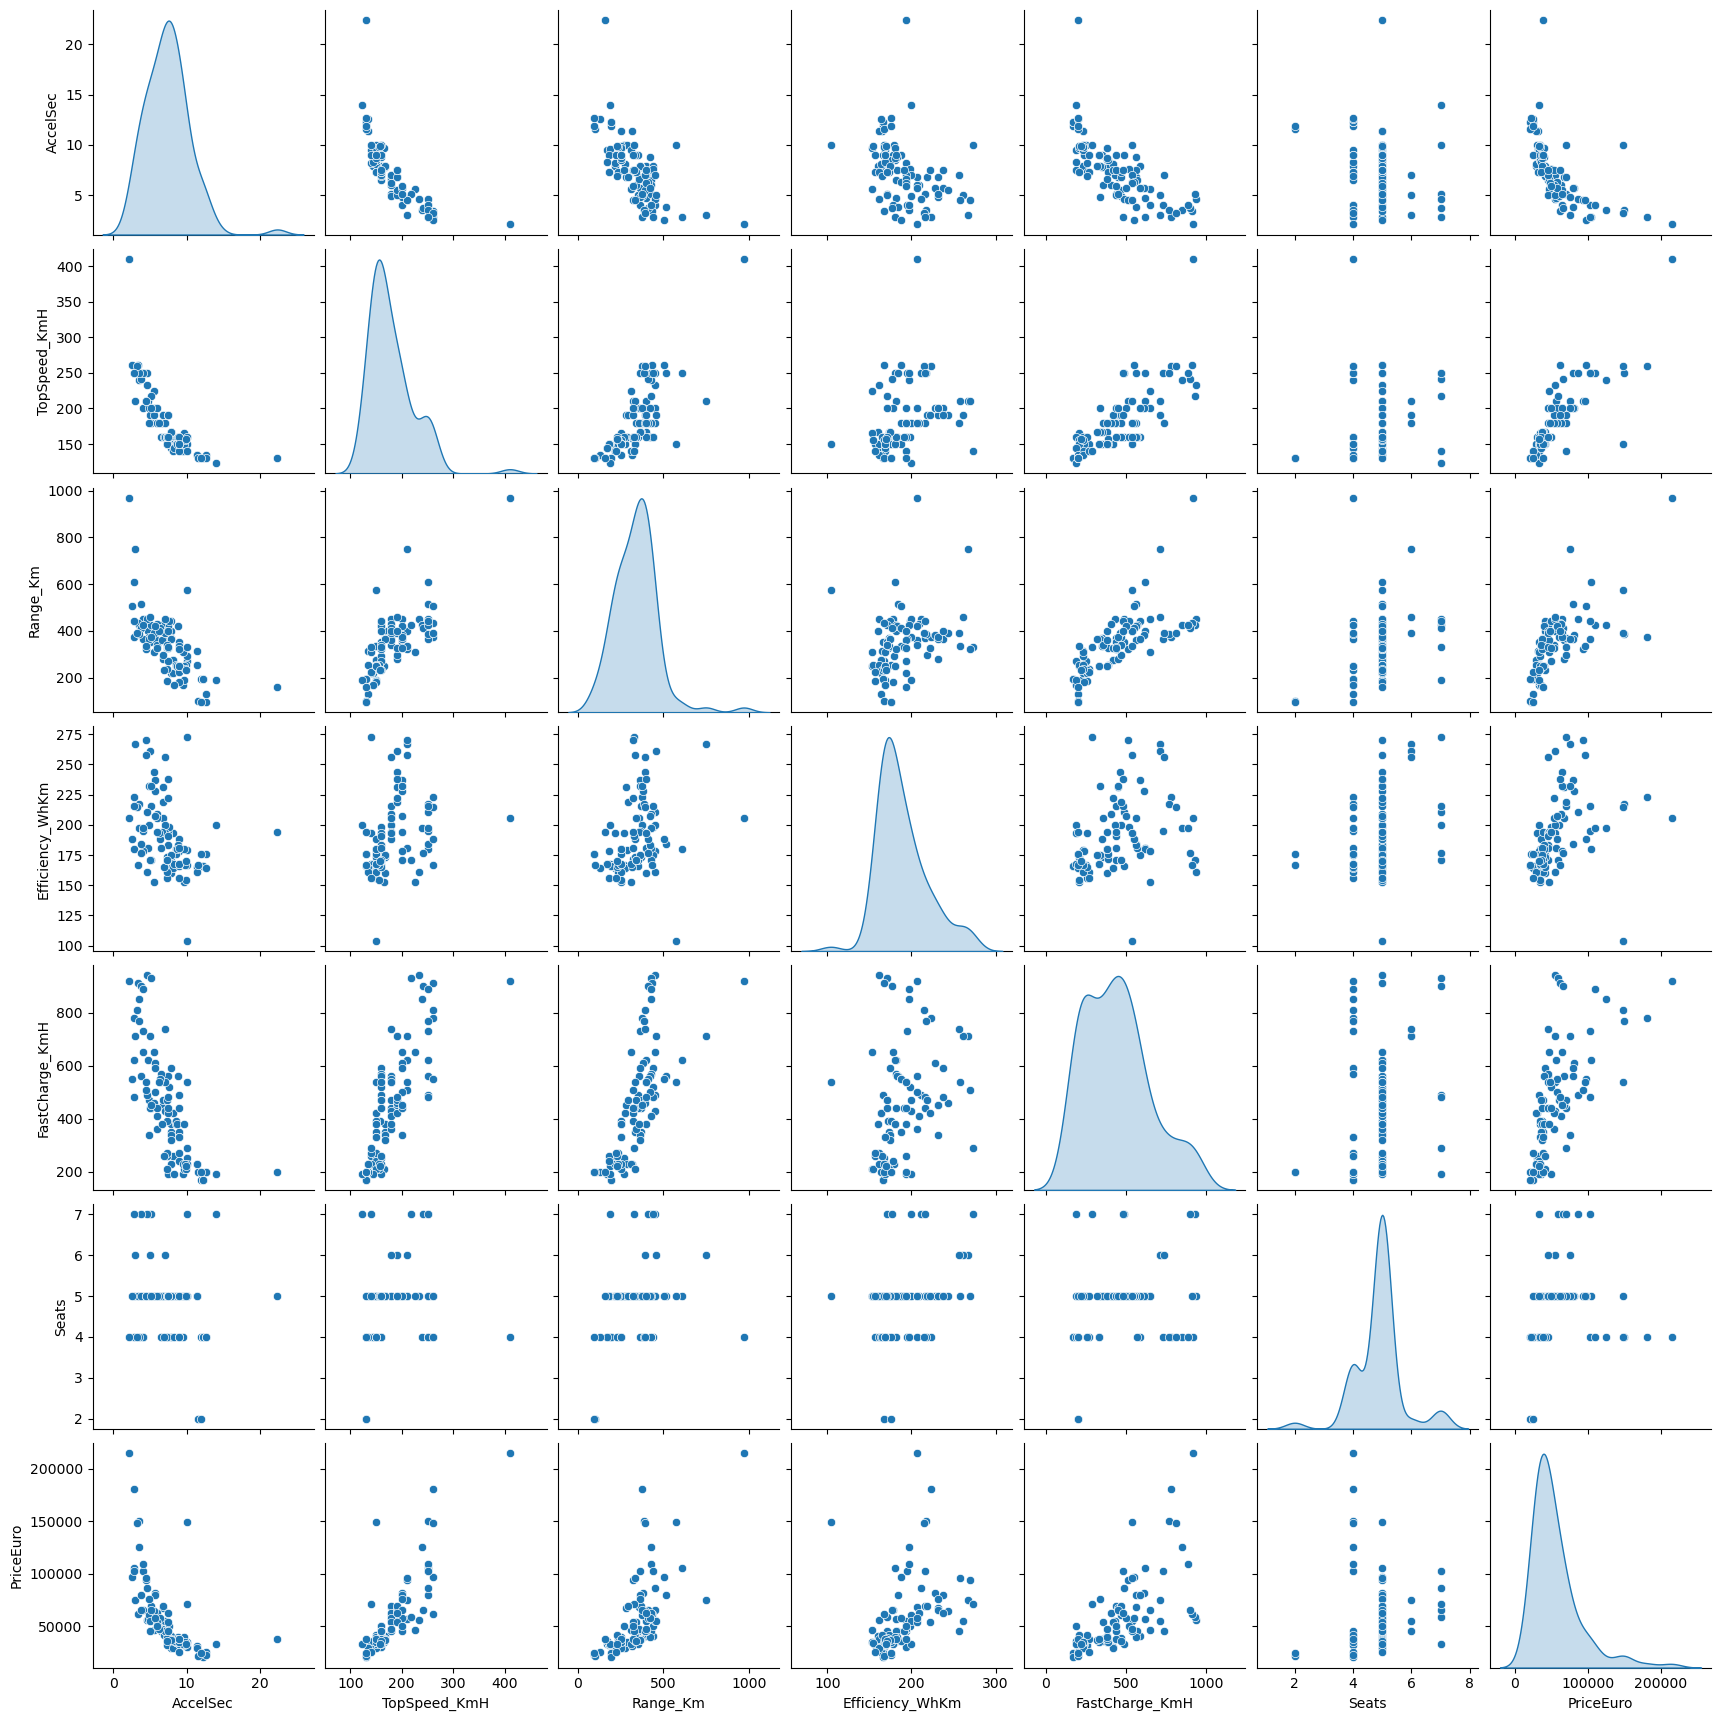

In [19]:
sns.pairplot(df1[con1], diag_kind='kde')
plt.show

## Perform EDA on second Datasets

In [63]:
df2.head()

,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Cluster
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,1
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,1
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50,1
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00,1
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74,0


In [21]:
# Here i am using my userdefine function for univariate Analysis
from EDA import univariate

Categorical variable : ['Name', 'Manufacturer', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'] countplot



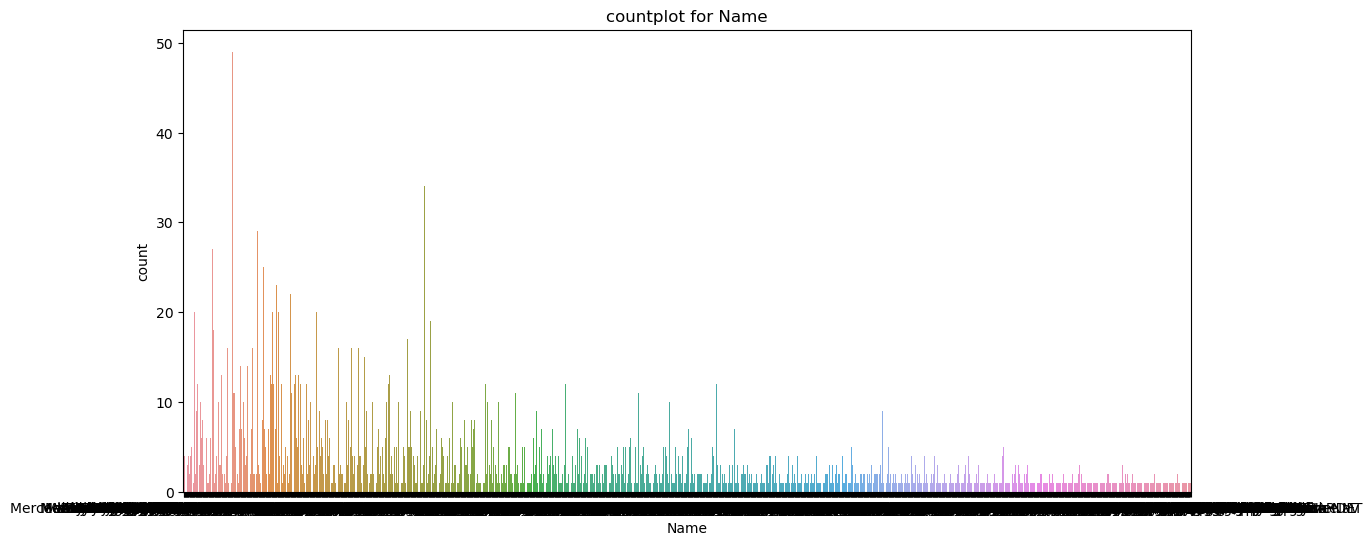

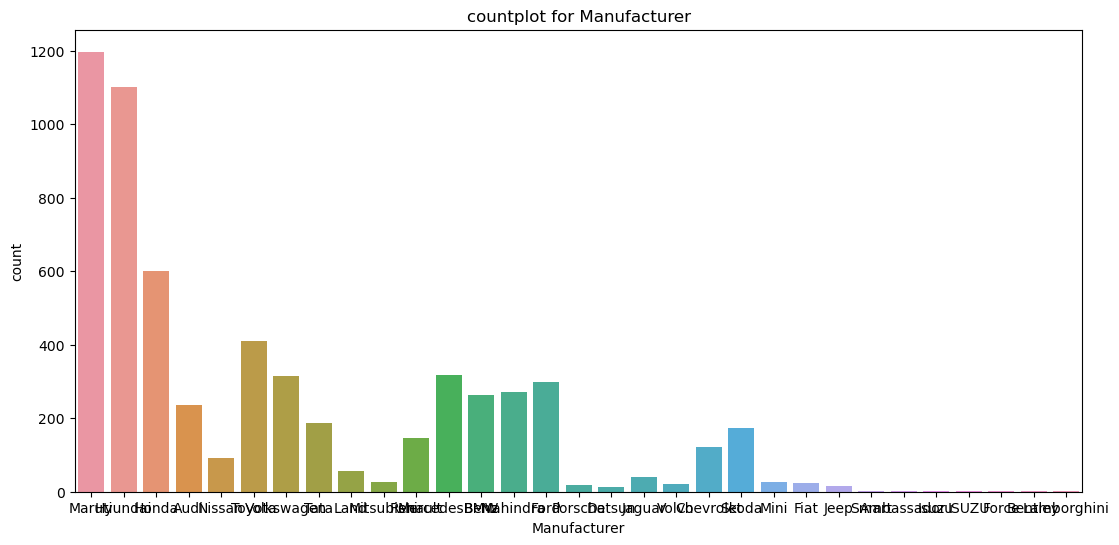

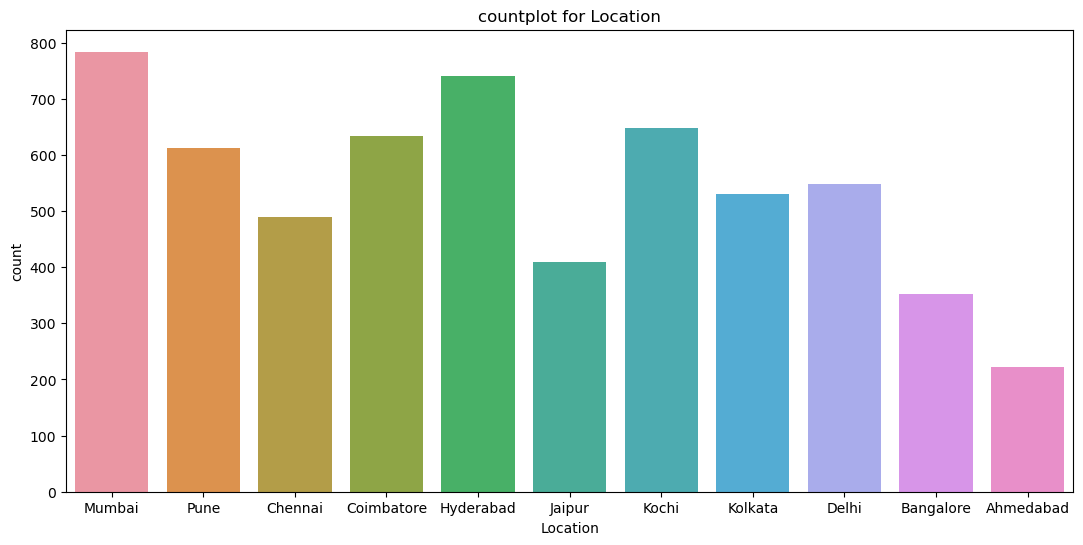

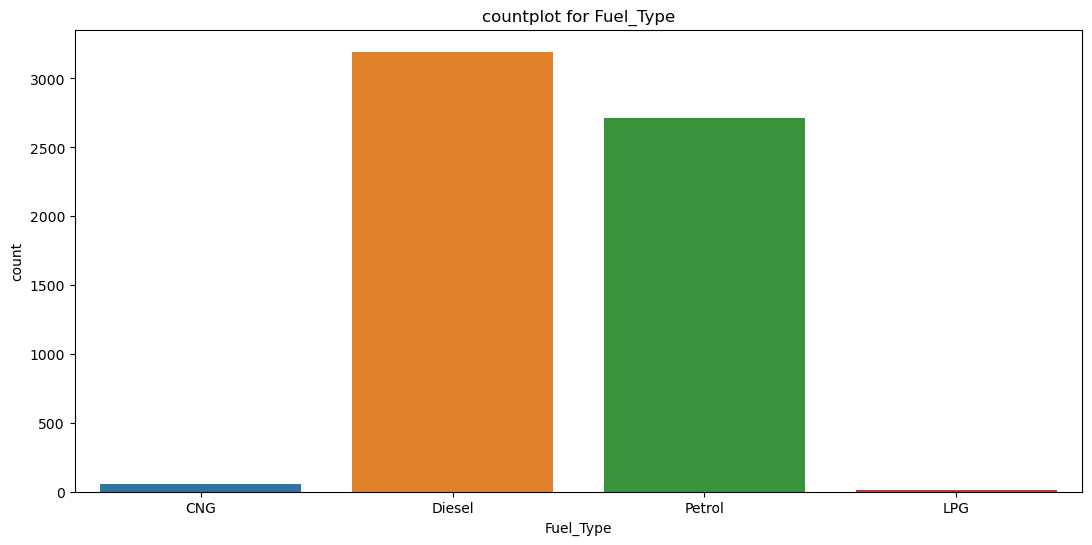

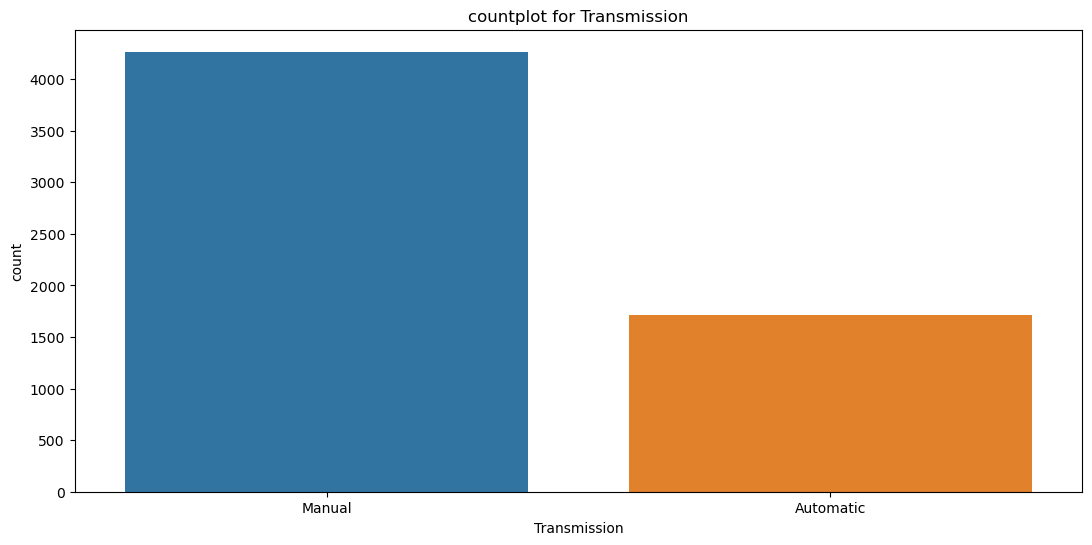

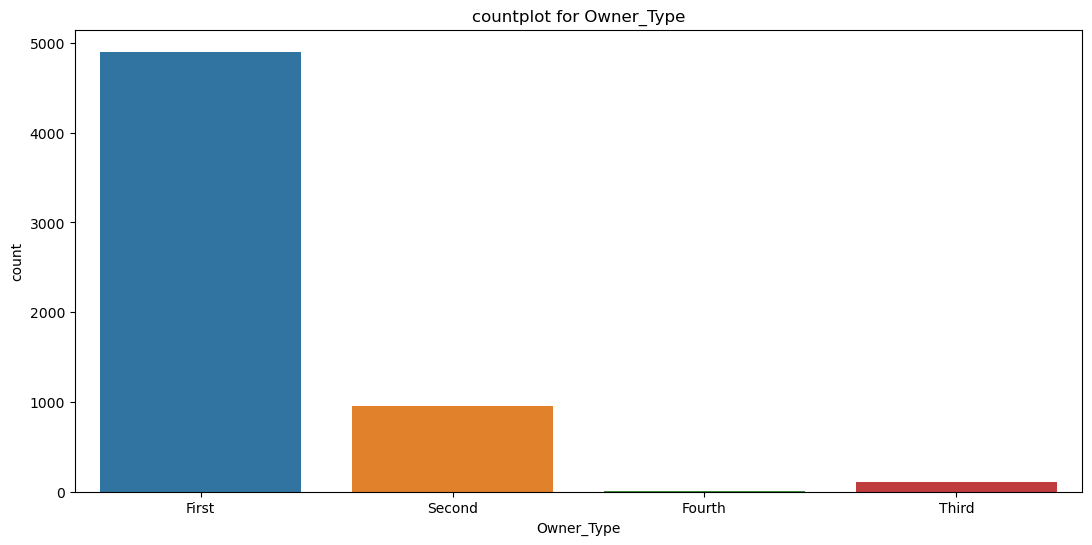



Contineous variable : ['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Engine CC', 'Power', 'Seats', 'Mileage Km/L', 'Price'] Histogram


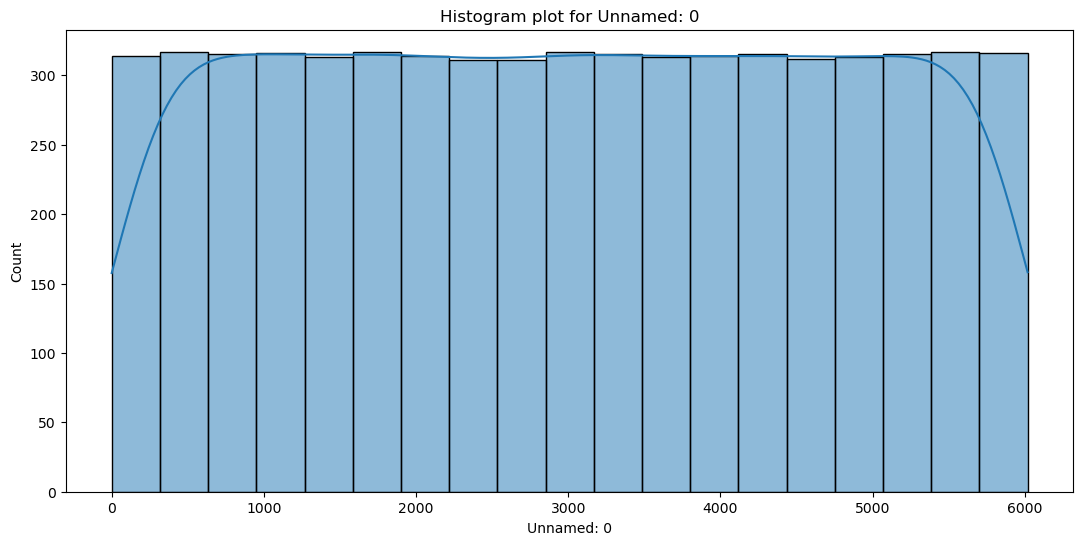

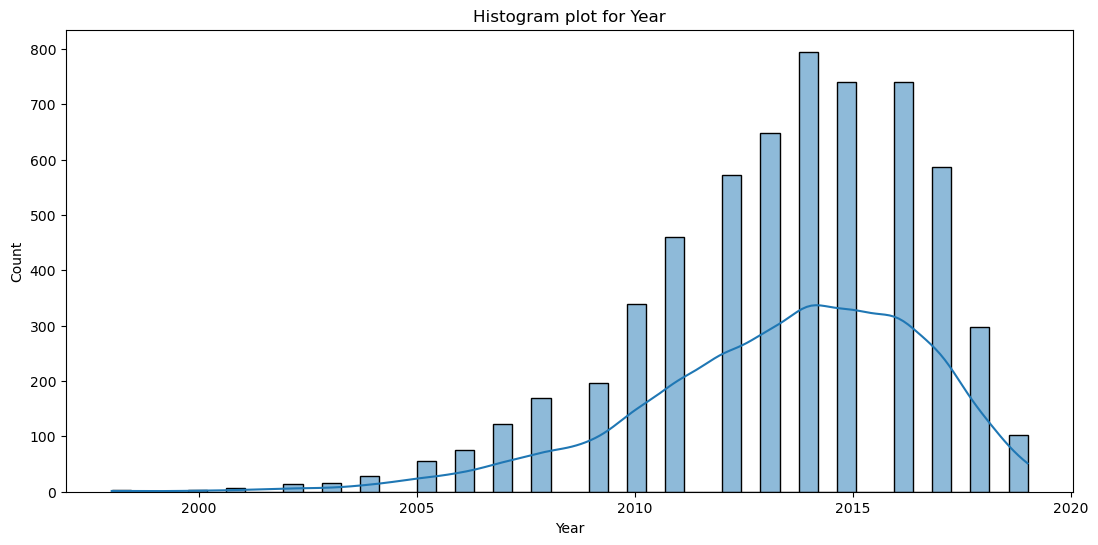

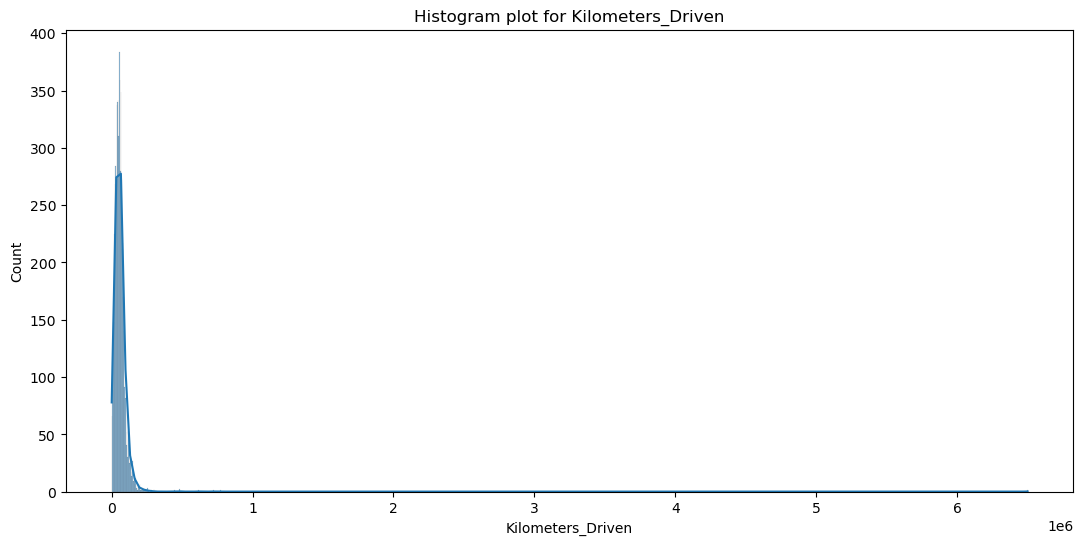

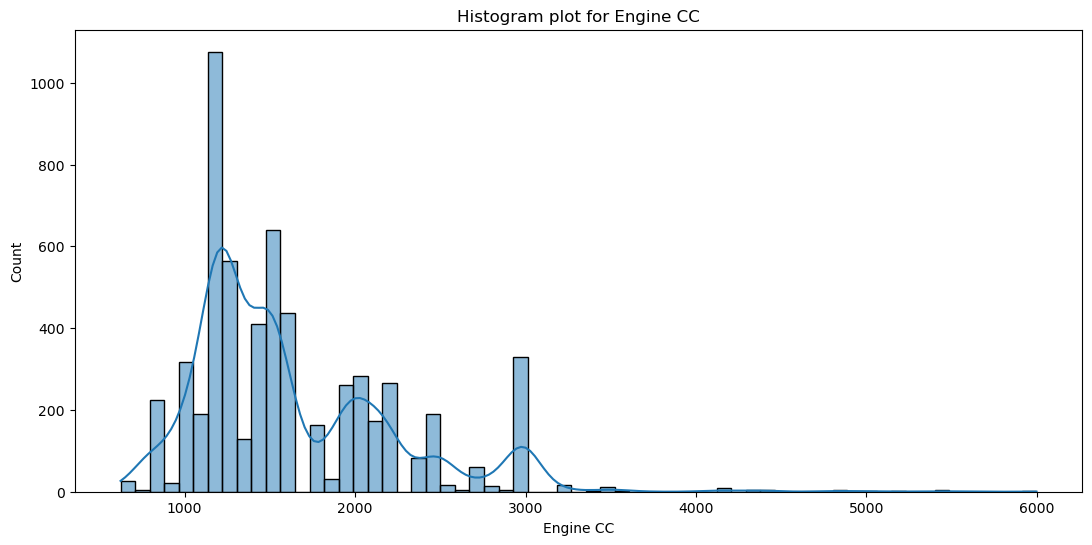

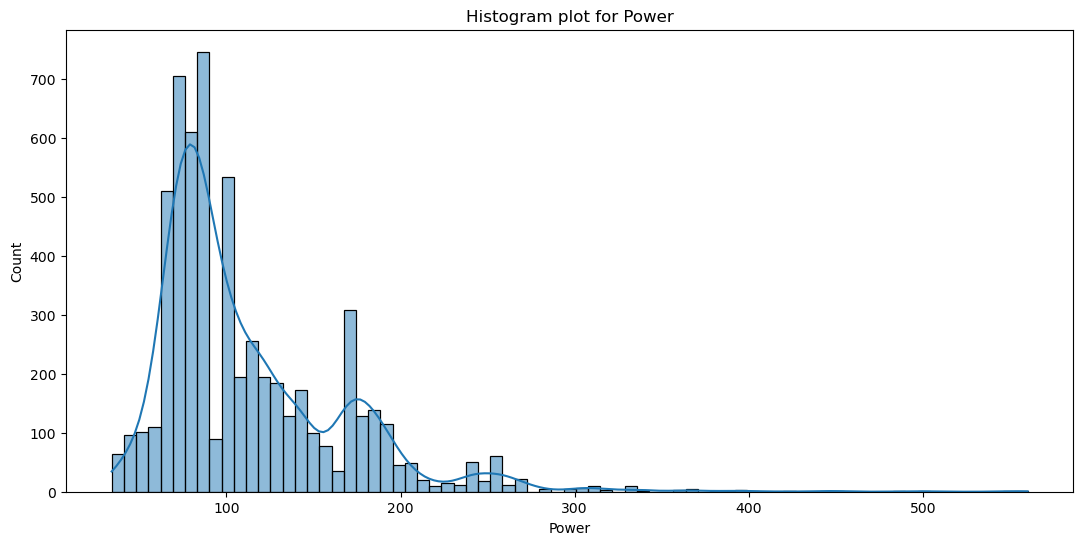

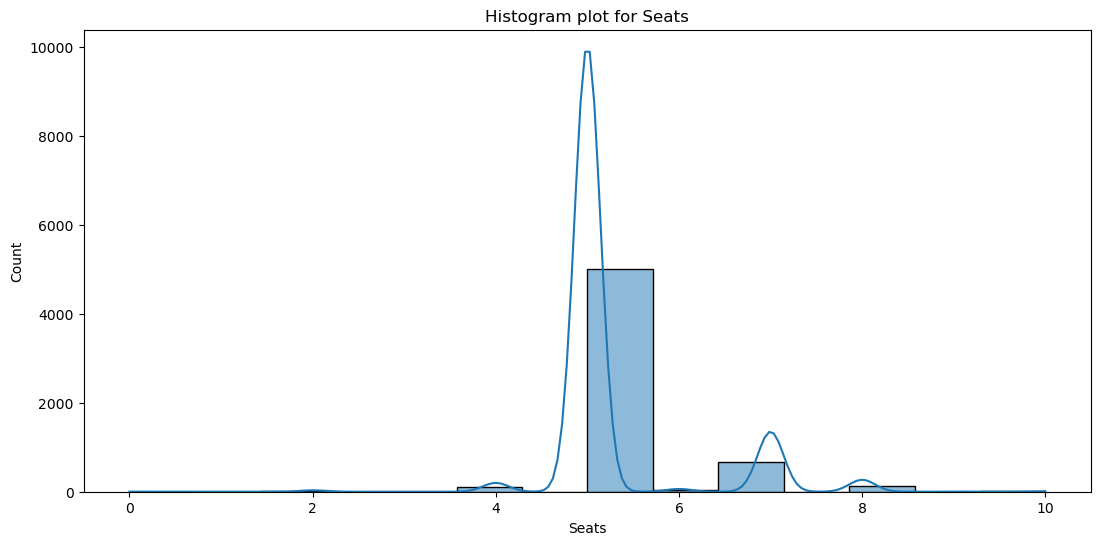

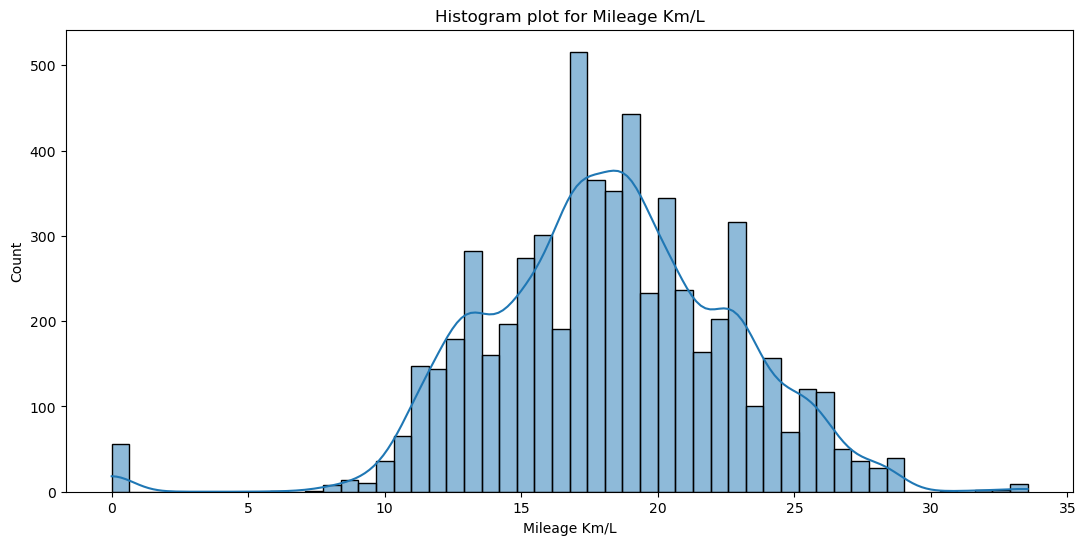

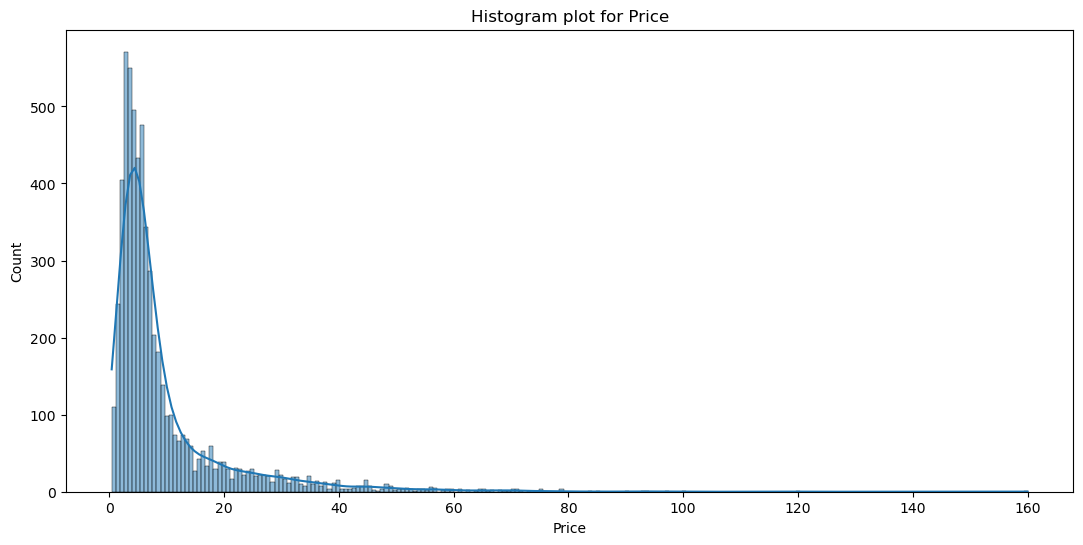

In [22]:
univariate(df2)

In [23]:
cat2 = df2.columns[df2.dtypes=='object']
con2 = df2.columns[df2.dtypes!='object']

In [24]:
cat2

Index(['Name', 'Manufacturer', 'Location', 'Fuel_Type', 'Transmission',
       'Owner_Type'],
      dtype='object')

In [25]:
con2

Index(['Unnamed: 0', 'Year', 'Kilometers_Driven', 'Engine CC', 'Power',
       'Seats', 'Mileage Km/L', 'Price'],
      dtype='object')

In [26]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

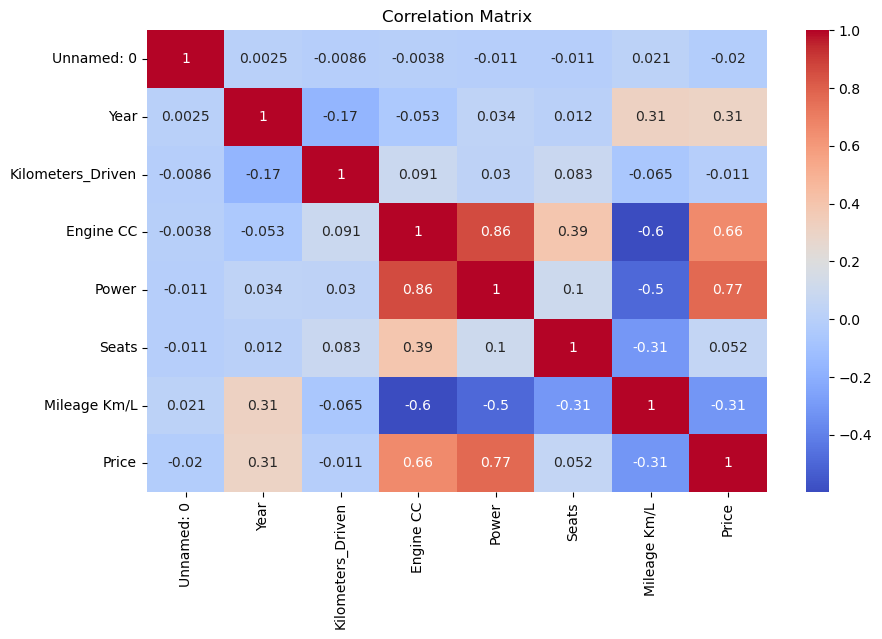

In [27]:
# Visualize correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df2[con2].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
df2.columns

Index(['Unnamed: 0', 'Name', 'Manufacturer', 'Location', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Engine CC', 'Power', 'Seats', 'Mileage Km/L', 'Price'],
      dtype='object')

# Building Machine Learning Model Using  a clustering algorithm like K-Means.

In [29]:
df2.head()

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Manufacturer       5975 non-null   object 
 3   Location           5975 non-null   object 
 4   Year               5975 non-null   int64  
 5   Kilometers_Driven  5975 non-null   int64  
 6   Fuel_Type          5975 non-null   object 
 7   Transmission       5975 non-null   object 
 8   Owner_Type         5975 non-null   object 
 9   Engine CC          5975 non-null   int64  
 10  Power              5975 non-null   float64
 11  Seats              5975 non-null   int64  
 12  Mileage Km/L       5975 non-null   float64
 13  Price              5975 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 653.6+ KB


In [64]:
# Drop the unnecessary columns
df2 = df2.drop(df2.columns[0], axis=1)
df2.head()

,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Cluster
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,1
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,1
2,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50,1
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00,1
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74,0


### Scale the Features: Normalize the numerical features.

In [53]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
con = df2.columns[df2.dtypes !='object']

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2[con])

# Convert scaled data back to DataFrame for easier handling
data_scaled = pd.DataFrame(data_scaled, columns=con)


In [55]:
data_scaled.head()

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price
0,-1.043059,0.145555,-1.037638,-1.014627,-0.344705,1.862377,-0.691815
1,0.496840,-0.193055,-0.065903,0.253475,-0.344705,0.329673,0.267595
2,-0.735080,-0.138440,-0.703188,-0.445435,-0.344705,0.004554,-0.446384
3,-0.427100,0.309398,-0.621656,-0.444317,2.127816,0.572960,-0.312513
4,-0.119120,-0.196659,0.576374,0.525583,-0.344705,-0.658954,0.735252


## Apply Clustering Algorithm

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

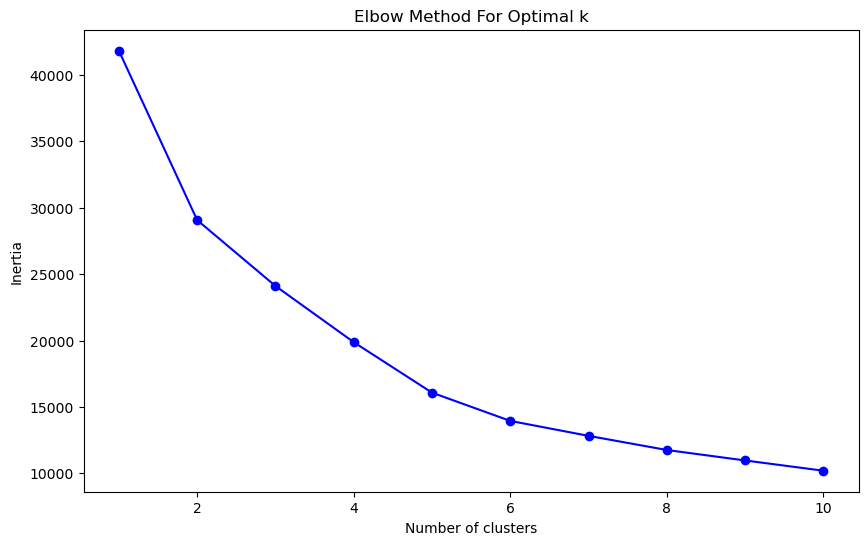

In [56]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


### Based on the elbow plot, choose the optimal number of clusters (let's assume it's 3 for this example).

In [58]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
df2['Cluster'] = clusters


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
clusters

array([1, 1, 1, ..., 0, 1, 1])

## Evaluate and Visualize Clusters
1. Use PCA for dimensionality reduction to visualize the clusters.
2. Inspect the characteristics of each cluster.

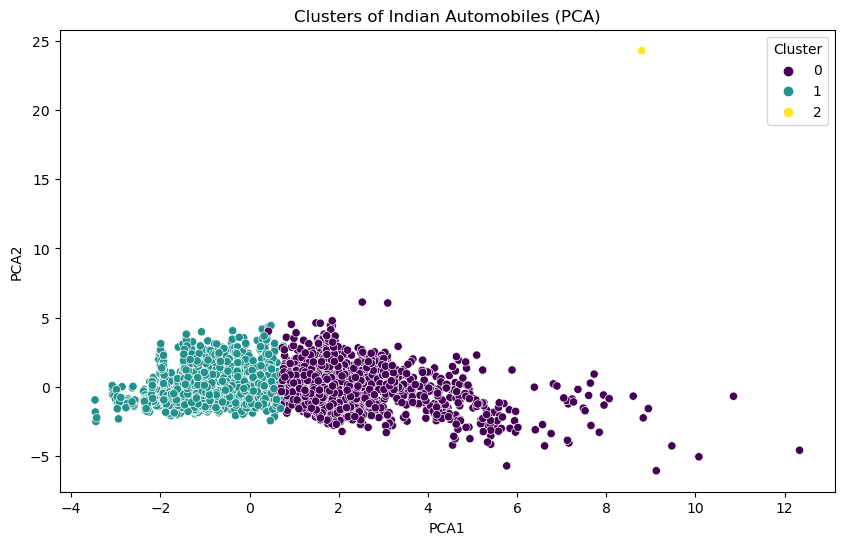

In [60]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA results and cluster labels
data_pca = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
data_pca['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_pca, palette='viridis')
plt.title('Clusters of Indian Automobiles (PCA)')
plt.show()
